In [ ]:
import pandas as ps
import seaborn as sns
import matplotlib as plt

In [ ]:
 from google.colab import files
uploaded = files.upload()

Saving clean_jobs.csv to clean_jobs.csv


In [ ]:
df = ps.read_csv('clean_jobs.csv')
df.head()

,id,title,company,location,link,source,date_posted,work_type,employment_type,description
0,1,Data Analyst,Meta,"New York, NY",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,NaN,NaN,The Social Measurement team is a growing team ...
1,2,Data Analyst,Meta,"San Francisco, CA",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,NaN,NaN,The Social Measurement team is a growing team ...
2,3,Data Analyst,Meta,"Los Angeles, CA",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,NaN,NaN,The Social Measurement team is a growing team ...
3,4,Data Analyst,Meta,"Washington, DC",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,NaN,NaN,The Social Measurement team is a growing team ...
4,5,Data Analyst II,Pinterest,"Chicago, IL",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-16,NaN,NaN,About Pinterest\n\nMillions of people around t...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               327 non-null    int64  
 1   title            327 non-null    object 
 2   company          327 non-null    object 
 3   location         327 non-null    object 
 4   link             327 non-null    object 
 5   source           327 non-null    object 
 6   date_posted      327 non-null    object 
 7   work_type        0 non-null      float64
 8   employment_type  0 non-null      float64
 9   description      327 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 25.7+ KB


In [ ]:
df.describe()

,id,work_type,employment_type
count,327.000000,0.0,0.0
mean,382.605505,NaN,NaN
std,224.546087,NaN,NaN
min,1.000000,NaN,NaN
25%,132.500000,NaN,NaN
50%,425.000000,NaN,NaN
75%,599.500000,NaN,NaN
max,741.000000,NaN,NaN


In [ ]:
df.iloc[:,-3:-1]

,work_type,employment_type
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
322,NaN,NaN
323,NaN,NaN
324,NaN,NaN
325,NaN,NaN


In [ ]:
df.drop(df.iloc[:,-3:-1], inplace = True, axis = 1)

In [ ]:
df.describe()

,id
count,327.000000
mean,382.605505
std,224.546087
min,1.000000
25%,132.500000
50%,425.000000
75%,599.500000
max,741.000000


In [ ]:
#check for dublicate coulumn

print(df.duplicated().sum())

0


In [ ]:
df_lower=df.apply(lambda x: x.astype(str).str.lower())
df_lower.head()

,id,title,company,location,link,source,date_posted,description
0,1,data analyst,meta,"new york, ny",https://www.linkedin.com/jobs/view/data-analys...,linkedin,2025-04-14,the social measurement team is a growing team ...
1,2,data analyst,meta,"san francisco, ca",https://www.linkedin.com/jobs/view/data-analys...,linkedin,2025-04-14,the social measurement team is a growing team ...
2,3,data analyst,meta,"los angeles, ca",https://www.linkedin.com/jobs/view/data-analys...,linkedin,2025-04-14,the social measurement team is a growing team ...
3,4,data analyst,meta,"washington, dc",https://www.linkedin.com/jobs/view/data-analys...,linkedin,2025-04-14,the social measurement team is a growing team ...
4,5,data analyst ii,pinterest,"chicago, il",https://www.linkedin.com/jobs/view/data-analys...,linkedin,2025-04-16,about pinterest\n\nmillions of people around t...


In [ ]:
#all dublicate row have the same title ,company ndescribtion
df_lower[df_lower.duplicated(['title','description' ,'company' ])].link.to_list()


['https://www.linkedin.com/jobs/view/data-analyst-at-meta-4186241553',
 'https://www.linkedin.com/jobs/view/data-analyst-at-meta-4186236994',
 'https://www.linkedin.com/jobs/view/data-analyst-at-meta-4186237989',
 'https://www.linkedin.com/jobs/view/data-analyst-ii-at-pinterest-4193356222',
 'https://www.linkedin.com/jobs/view/data-analyst-ii-at-pinterest-4193351793',
 'https://www.linkedin.com/jobs/view/data-analyst-at-fanduel-4206048749',
 'https://www.linkedin.com/jobs/view/data-products-analyst-youtube-at-google-4209686721',
 'https://www.linkedin.com/jobs/view/data-products-analyst-youtube-at-google-4209686719',
 'https://www.linkedin.com/jobs/view/data-products-analyst-youtube-at-google-4209686718',
 'https://in.linkedin.com/jobs/view/data-analytics-at-ey-4210588770',
 'https://www.linkedin.com/jobs/view/data-scientist-product-analytics-at-meta-4129160710',
 'https://www.linkedin.com/jobs/view/data-scientist-product-analytics-at-meta-4120825485',
 'https://www.linkedin.com/jobs/v

In [ ]:
# أولاً، نحط القيم الممكن تكون موجودة لكل فئة
def clean_category(cat):
    cat = cat.lower()

    if any(word in cat for word in ['analyst', 'analysis', 'analytics', 'analista']):
        return 'data analysis'
    elif any(word in cat for word in ['engineer', 'engineering','bdata']):
        return 'data engineer'
    elif any(word in cat for word in ['machine learning', 'ml', 'ai','ai|ml','bmachine']):
        return 'machine learning & AI'
    elif any (word in cat for word in ['scientist', 'science', 'research','cientista']):
        return 'data scientist'
    else:
        return 'other'

# نفترض أن عندك عمود اسمه 'category' في df_lower
df_lower['cleaned_category'] = df_lower['title'].apply(clean_category)
df_lower.value_counts('cleaned_category')


,count
cleaned_category,
data analysis,170
data engineer,93
data scientist,54
machine learning & AI,7
other,3


In [ ]:
def map_location(location):
    location = str(location).lower()
    if any(x in location for x in ['united states', 'ny', 'ca', 'tx', 'wa', 'il', 'dc', 'ma', 'fl', 'nj', 'pa']):
        return 'USA'
    elif any(x in location for x in ['india', 'karnataka', 'delhi', 'telangana']):
        return 'India'
    elif any(x in location for x in ['united kingdom', 'england', 'london', 'scotland']):
        return 'UK'
    elif any(x in location for x in ['brazil', 'são paulo']):
        return 'Brazil'
    elif 'canada' in location:
        return 'Canada'
    elif 'germany' in location:
        return 'Germany'
    elif any(x in location for x in ['uae', 'dubai']):
        return 'UAE'
    elif any(x in location for x in ['egypt', 'cairo']):
        return 'Egypt'
    else:
        return 'Other'

# Apply the function
df_lower['location_category'] = df_lower['location'].apply(map_location)

# Show value counts
print(df_lower['location_category'].value_counts())


location_category
USA      226
India     41
Other     36
UK        23
UAE        1
Name: count, dtype: int64



def map_location(location):
location = str(location).lower()
    if any(x in location for x in ['united states', 'ny', 'ca', 'tx', 'wa', 'il', 'dc', 'ma', 'fl', 'nj', 'pa']):
        return 'USA'
    elif 'india' in location or 'karnataka' in location or 'delhi' in location or 'telangana' in location:
       return 'India'
    elif 'united kingdom' in location or 'england' in location or 'london' in location or 'scotland' in location:
        return 'UK'
    elif 'brazil' in location or 'são paulo' in location:
        return 'Brazil'
    elif 'canada' in location:
        return 'Canada'
    elif 'germany' in location:
        return 'Germany'
    elif 'uae' in location or 'dubai' in location:
        return 'UAE'
    elif 'egypt' in location or 'cairo' in location:
        return 'Egypt'
    else:
        return 'Other'

df_lower['location_category'] = df_lower['location'].apply(map_location)
df_lower.value_counts('location_category')



In [ ]:
import re
import pandas as pd


loc_map = {
    r'united states|, *\b(?:ca|ny|wa|tx|il|fl|va|nj|ga|dc|ma|ct|pa|or|oh|nc)\b': 'USA',
    r'india|karnataka|uttar pradesh|maharashtra|telangana|up': 'India',
    r'united kingdom|england|scotland|wales|northern ireland|united kingdom': 'UK',
    r'brazil|sã[oã] paulo|rio de janeiro|minas gerais': 'Brazil',
    r'canada': 'Canada',
    r'spain|catalonia|barcelona': 'Spain',
    r'germany|berlin': 'Germany',
    r'france|î?le-de-france': 'France',
    r'poland|mazowieckie': 'Poland',
    r'bulgaria|sofia': 'Bulgaria',
    r'indonesia|jakarta|banten|tangerang': 'Indonesia',
    r'saudi arabia|riyadh': 'Saudi Arabia',
    r'united arab emirates|dubai': 'UAE',
    r'egypt|cairo': 'Egypt',
    r'singapore': 'Singapore',
    r'ireland|dublin|cork': 'Ireland',
    r'south africa|gauteng|johannesburg': 'South Africa',
    r'mexico': 'Mexico',
    r'philippines|manila': 'Philippines',
    r'netherlands|amsterdam': 'Netherlands',

}

# 2) دالة التصنيف
def categorize_location(loc):
    s = str(loc).lower()
    for pattern, country in loc_map.items():
        if re.search(pattern, s):
            return country
    return 'Other'

# 3) تطبيقها على العمود
df_lower['loc_category'] = df_lower['location'].apply(categorize_location).astype('category')

# 4) عدّ الفئات للتأكد
print(df_lower['loc_category'].value_counts())


loc_category
USA             190
India            47
UK               25
Other            23
Brazil           10
Indonesia         5
Canada            5
Ireland           4
Spain             3
South Africa      3
Egypt             2
France            1
Bulgaria          1
Philippines       1
Netherlands       1
Mexico            1
Germany           1
Singapore         1
Saudi Arabia      1
Poland            1
UAE               1
Name: count, dtype: int64


In [ ]:

df_lower.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 327 non-null    object  
 1   title              327 non-null    object  
 2   company            327 non-null    object  
 3   location           327 non-null    object  
 4   link               327 non-null    object  
 5   source             327 non-null    object  
 6   date_posted        327 non-null    object  
 7   description        327 non-null    object  
 8   cleaned_category   327 non-null    object  
 9   location_category  327 non-null    object  
 10  loc_category       327 non-null    category
dtypes: category(1), object(10)
memory usage: 26.7+ KB


In [ ]:
import re

def extract_salary(job_description):
    """
    Extract salary information from a job description using regex patterns.
    Returns a dictionary with min_salary, max_salary, currency, and period if found,
    or None if no salary is found.
    """
    # Improved patterns to capture different salary formats
    patterns = [
        # Range with "to" or "-" (e.g., $100,000 to $150,000 per year)
        r'(?P<currency>\$|USD|usd)\s*(?P<min>\d{1,3}(?:,\d{3})*(?:\.\d{2})?)\s*(?:to|-|—)\s*(?P<currency2>\$|USD|usd)?\s*(?P<max>\d{1,3}(?:,\d{3})*(?:\.\d{2})?)\s*(?P<period>per year|yearly|annually|monthly|hourly|yr|y|/year|/yr|/y|/hour|/hr|/h)?',
        # Single value (e.g., $120,000 per year)
        r'(?P<currency>\$|USD|usd)\s*(?P<value>\d{1,3}(?:,\d{3})*(?:\.\d{2})?)\s*(?P<period>per year|yearly|annually|monthly|hourly|yr|y|/year|/yr|/y|/hour|/hr|/h)?',
        # Range without currency repetition (e.g., 100,000-150,000 USD)
        r'(?P<min>\d{1,3}(?:,\d{3})*(?:\.\d{2})?)\s*(?:to|-|—)\s*(?P<max>\d{1,3}(?:,\d{3})*(?:\.\d{2})?)\s*(?P<currency>\$|USD|usd)\s*(?P<period>per year|yearly|annually|monthly|hourly|yr|y|/year|/yr|/y|/hour|/hr|/h)?',
    ]

    for pattern in patterns:
        match = re.search(pattern, job_description, re.IGNORECASE)
        if match:
            groups = match.groupdict()
            currency = groups.get('currency', '$').strip()
            period = (groups.get('period') or '').strip().lower()

            # Standardize period
            if any(p in period for p in ['hour', 'hr', 'h']):
                period = 'hourly'
            elif any(p in period for p in ['year', 'yr', 'y', 'annual']):
                period = 'yearly'
            elif 'month' in period:
                period = 'monthly'
            else:
                period = 'yearly'  # Default assumption

            # Handle different formats
            if 'min' in groups and 'max' in groups:
                return {
                    'min_salary': float(groups['min'].replace(',', '')),
                    'max_salary': float(groups['max'].replace(',', '')),
                    'currency': currency,
                    'period': period
                }
            elif 'value' in groups:
                val = float(groups['value'].replace(',', ''))
                return {
                    'min_salary': val,
                    'max_salary': val,
                    'currency': currency,
                    'period': period
                }

    return None

def process_job_descriptions(column_description):
    """
    Process the column description, split into individual job descriptions,
    and extract salary information for each job.
    Returns a list of dictionaries with extracted salary info.
    """
    # Split the column description by 'show more' or similar markers
    job_descriptions = re.split(r'show more|\.{3,}', column_description)

    results = []
    for i, job in enumerate(job_descriptions, 1):
        job = job.strip()
        if not job:
            continue

        salary_info = extract_salary(job)
        results.append({
            'job_id': i,
            'description_snippet': job[:100] + '...' if len(job) > 100 else job,
            'salary_info': salary_info
        })

    return results

# Example usage
if __name__ == "__main__":
    # Sample job descriptions (use the full text in practice)
    column_description = """
    the social measurement team...$124,000/year to $176,000/year + bonus + equity + benefits...show more
    about pinterest...$100,937—$207,811 USD...show more
    about fanduel...$100,000 - $130,000 USD...show more
    netflix is one...$50,000-240,000...show more
    position offers...USD 85,000 per year...show more
    compensation...120000 annually...show more
    hourly rate...$45/hour...show more
    """

    jobs = process_job_descriptions(column_description)

    for job in jobs:
        print(f"\nJob {job['job_id']}:")
        print(f"Snippet: {job['description_snippet']}")
        if job['salary_info']:
            salary = job['salary_info']
            print(f"Salary: {salary['currency']}{salary['min_salary']:,.0f} to {salary['currency']}{salary['max_salary']:,.0f} ({salary['period']})")
        else:
            print("Salary: Not found")


Job 1:
Snippet: the social measurement team
Salary: Not found

Job 2:
Snippet: $124,000/year to $176,000/year + bonus + equity + benefits
Salary: $124,000 to $124,000 (yearly)

Job 4:
Snippet: about pinterest
Salary: Not found

Job 5:
Snippet: $100,937—$207,811 USD
Salary: $100,937 to $207,811 (yearly)

Job 7:
Snippet: about fanduel
Salary: Not found

Job 8:
Snippet: $100,000 - $130,000 USD
Salary: $100,000 to $130,000 (yearly)

Job 10:
Snippet: netflix is one
Salary: Not found

Job 11:
Snippet: $50,000-240,000
Salary: $50,000 to $240,000 (yearly)

Job 13:
Snippet: position offers
Salary: Not found

Job 14:
Snippet: USD 85,000 per year
Salary: USD85,000 to USD85,000 (yearly)

Job 16:
Snippet: compensation
Salary: Not found

Job 17:
Snippet: 120000 annually
Salary: Not found

Job 19:
Snippet: hourly rate
Salary: Not found

Job 20:
Snippet: $45/hour
Salary: $45 to $45 (hourly)


In [ ]:
# Apply extract_salary to each description row
df_lower['salary'] = df_lower['description'].apply(extract_salary)
df_lower['salary']

,salary
0,"{'min_salary': 124000.0, 'max_salary': 124000...."
1,"{'min_salary': 124000.0, 'max_salary': 124000...."
2,"{'min_salary': 124000.0, 'max_salary': 124000...."
3,"{'min_salary': 124000.0, 'max_salary': 124000...."
4,"{'min_salary': 100937.0, 'max_salary': 207811...."
...,...
322,None
323,None
324,None
325,None


In [ ]:
# Normalize the dictionary column into individual columns
salary_df = df_lower['salary'].apply(pd.Series)

df_lower = df_lower.join(salary_df)


In [ ]:
df_lower.head()

,id,title,company,location,link,source,date_posted,description,cleaned_category,location_category,loc_category,salary,min_salary,max_salary,currency,period
0,1,data analyst,meta,"new york, ny",https://www.linkedin.com/jobs/view/data-analys...,linkedin,2025-04-14,the social measurement team is a growing team ...,data analysis,USA,USA,"{'min_salary': 124000.0, 'max_salary': 124000....",124000.0,124000.0,$,yearly
1,2,data analyst,meta,"san francisco, ca",https://www.linkedin.com/jobs/view/data-analys...,linkedin,2025-04-14,the social measurement team is a growing team ...,data analysis,USA,USA,"{'min_salary': 124000.0, 'max_salary': 124000....",124000.0,124000.0,$,yearly
2,3,data analyst,meta,"los angeles, ca",https://www.linkedin.com/jobs/view/data-analys...,linkedin,2025-04-14,the social measurement team is a growing team ...,data analysis,USA,USA,"{'min_salary': 124000.0, 'max_salary': 124000....",124000.0,124000.0,$,yearly
3,4,data analyst,meta,"washington, dc",https://www.linkedin.com/jobs/view/data-analys...,linkedin,2025-04-14,the social measurement team is a growing team ...,data analysis,USA,USA,"{'min_salary': 124000.0, 'max_salary': 124000....",124000.0,124000.0,$,yearly
4,5,data analyst ii,pinterest,"chicago, il",https://www.linkedin.com/jobs/view/data-analys...,linkedin,2025-04-16,about pinterest\n\nmillions of people around t...,data analysis,USA,USA,"{'min_salary': 100937.0, 'max_salary': 207811....",100937.0,207811.0,$,yearly


In [ ]:
# Filter jobs with salary info
df_with_salary = df_lower[df_lower['min_salary'].notnull()]


In [ ]:
import re

def extract_skills(text):
    skills_keywords = ['skills required', 'required skills', 'qualifications', 'experience with', 'you should have']
    for keyword in skills_keywords:
        pattern = rf"{keyword}.*?(?=(\n|\.\s|responsibilities|duties|requirements|$))"
        match = re.search(pattern, text, re.IGNORECASE | re.DOTALL)
        if match:
            return match.group().strip()
    return None

def extract_responsibilities(text):
    responsibilities_keywords = ['responsibilities', 'your role', 'you will', 'duties include', 'as a']
    for keyword in responsibilities_keywords:
        pattern = rf"{keyword}.*?(?=(\n|\.\s|skills|qualifications|requirements|$))"
        match = re.search(pattern, text, re.IGNORECASE | re.DOTALL)
        if match:
            return match.group().strip()
    return None


In [ ]:
#save and download this data
df_lower.to_csv('clean_jobs.csv', index=False)
files.download('clean_jobs.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

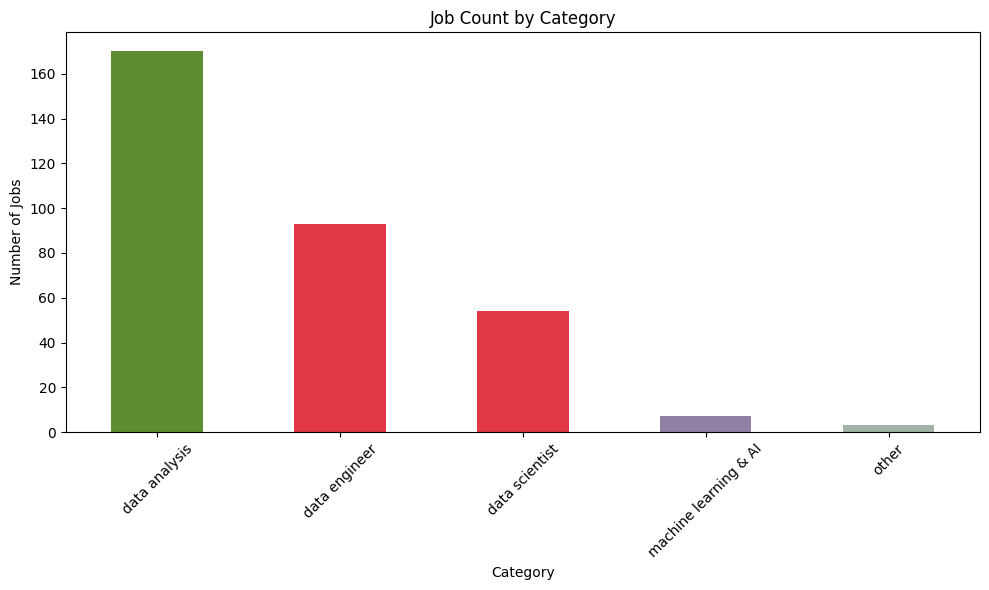

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df_lower['cleaned_category'].value_counts().plot(kind='bar', title='Job Count by Category')
value_counts = df_lower['cleaned_category'].value_counts()

colors = ['#5E8C30', '#E23745','#E23745', '#9080A6', '#A2B2A4']
value_counts.plot(kind='bar', color=colors, title='Job Count by Category')

plt.xlabel("Category")
plt.ylabel("Number of Jobs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


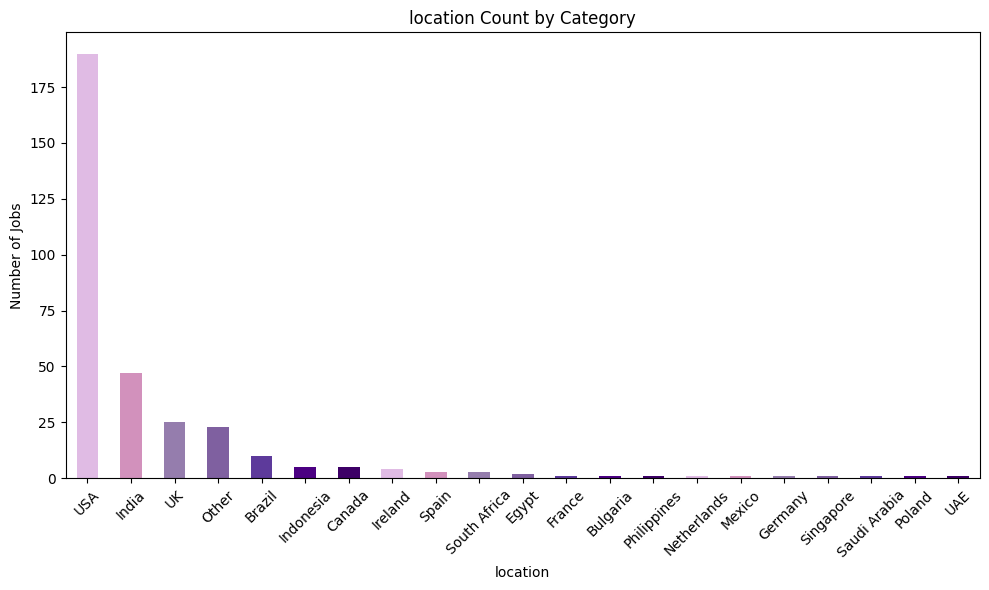

In [ ]:
#horezental
value_counts = df_lower['loc_category'].value_counts()
plt.figure(figsize=(10, 6))
colors = [ "#E0BBE4",
    "#D291BC",
    "#957DAD",
    "#7F60A0",
    "#5D3A9B",
    "#4B0082",
    "#3D0066"]
value_counts.plot(kind='bar', color=colors, title='location Count by Category')

plt.xlabel("location")
plt.ylabel("Number of Jobs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

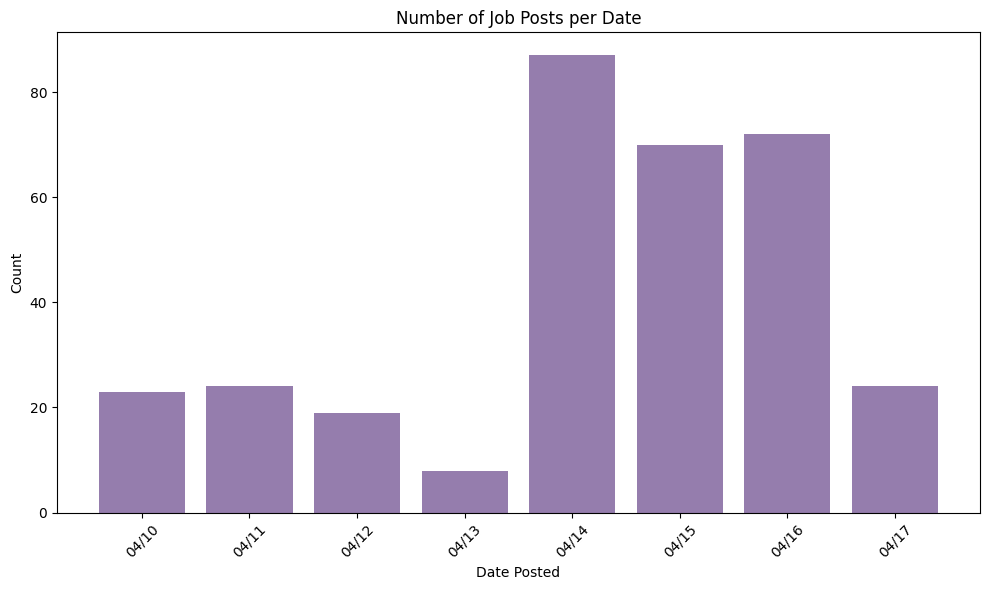

In [ ]:
#jop posted over the time
# Plot 1: Bar Chart
import pandas as pd
import matplotlib.pyplot as plt

df_lower['date_posted'] = pd.to_datetime(df_lower['date_posted'])

date_counts = df_lower['date_posted'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(date_counts.index.strftime('%m/%d'), date_counts.values, color='#957DAD')

plt.title("Number of Job Posts per Date")
plt.xlabel("Date Posted")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


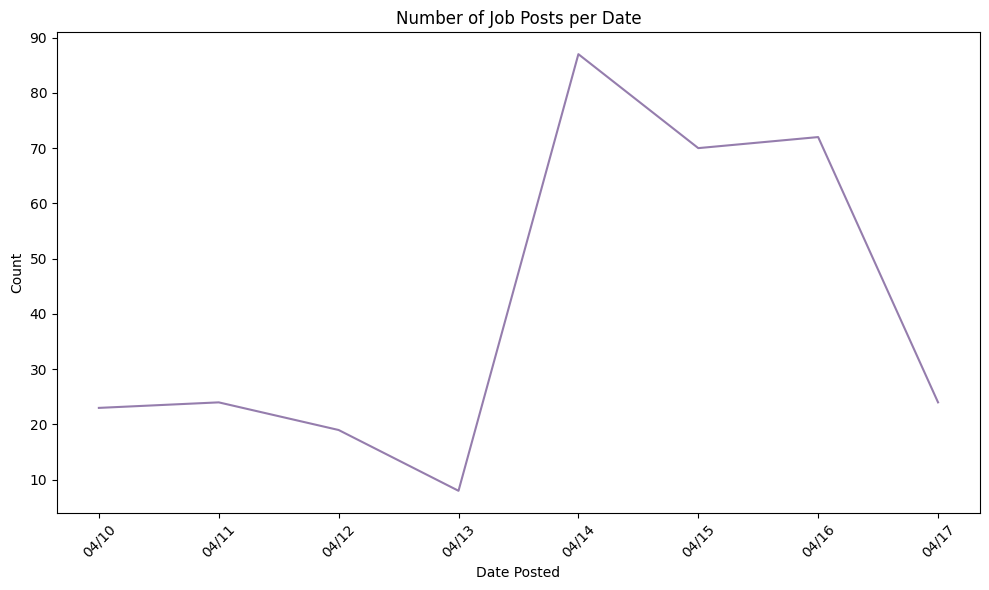

In [ ]:
#jop posted over the time
# Plot 1: line Chart
import pandas as pd
import matplotlib.pyplot as plt

df_lower['date_posted'] = pd.to_datetime(df_lower['date_posted'])

date_counts = df_lower['date_posted'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(date_counts.index.strftime('%m/%d'), date_counts.values, color='#957DAD')

plt.title("Number of Job Posts per Date")
plt.xlabel("Date Posted")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Bar Chart / Line Chart of job posts over time:

Identified posting activity by date.

Allowed us to spot which days had peak job postings

Insight Gained
Found peak dates with the most job postings.
Identified most common job fields or sectors.
Used color coding and formatting to enhance readability.


Insight from the Plot:
Peaks: You can easily identify which dates had spikes in job postings.

Category Popularity Over Time: Some categories consistently appear over time, while others spike or dip on certain days.

Trends: For example, if "data analysis" or "AI" jobs are always present while others are rare, it shows employer demand patterns.

Volume comparison: The stacked bars allow comparison not only of total daily volume but also how that volume is distributed among categories.



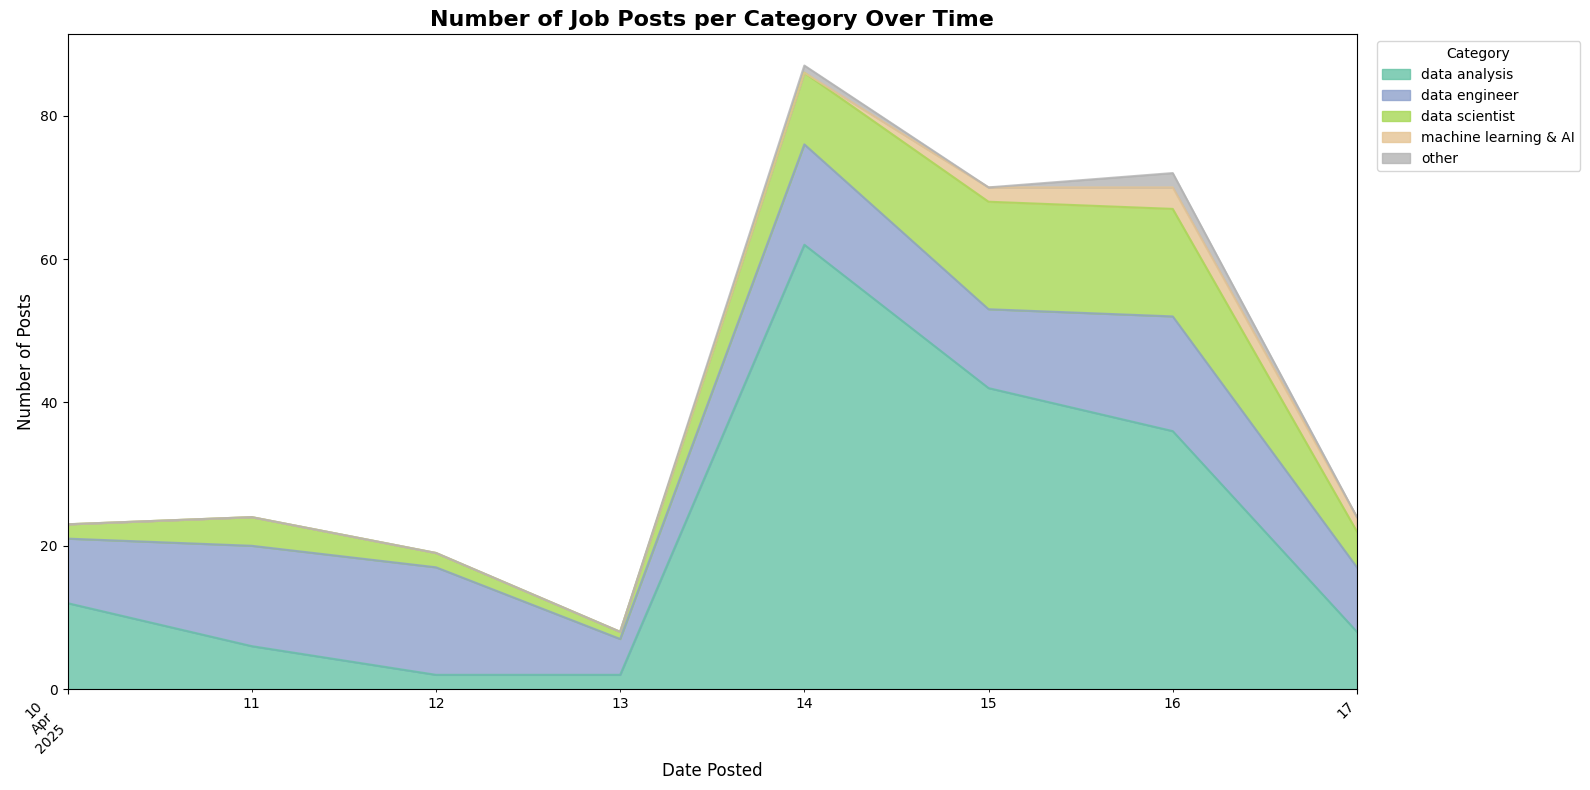

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert dates safely
df_lower['date_posted'] = pd.to_datetime(df_lower['date_posted'], errors='coerce')

# Group and reshape data
jobs_per_cat_date = (
    df_lower.groupby(['date_posted', 'cleaned_category'])
    .size()
    .unstack(fill_value=0)
)

# Generate a professional color palette
categories = jobs_per_cat_date.columns
num_colors = len(categories)
palette = sns.color_palette("Set2", n_colors=num_colors)

# Plot
jobs_per_cat_date.plot(
    kind='area',
    stacked=True,
    figsize=(16, 8),
    colormap='Set2',
    alpha=0.8
)


plt.title("Number of Job Posts per Category Over Time", fontsize=16, fontweight='bold')
plt.xlabel("Date Posted", fontsize=12)
plt.ylabel("Number of Posts", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category', bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px

treemap_df = df_lower.groupby(['loc_category', 'company']).size().reset_index(name='count')

fig = px.treemap(treemap_df, path=['loc_category', 'company'], values='count',
                 title='Job Posts: Country → Company',
                 color='loc_category', color_discrete_sequence=px.colors.qualitative.Set2)
fig.show()


<ipython-input-27-6dda0d1bf0b6>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  treemap_df = df_lower.groupby(['loc_category', 'company']).size().reset_index(name='count')
/usr/local/lib/python3.11/dist-packages/plotly/express/_core.py:1727: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfg = df.groupby(path[i:]).agg(agg_f)
/usr/local/lib/python3.11/dist-packages/plotly/express/_core.py:1727: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silen

<ipython-input-28-466fc0881b75>:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



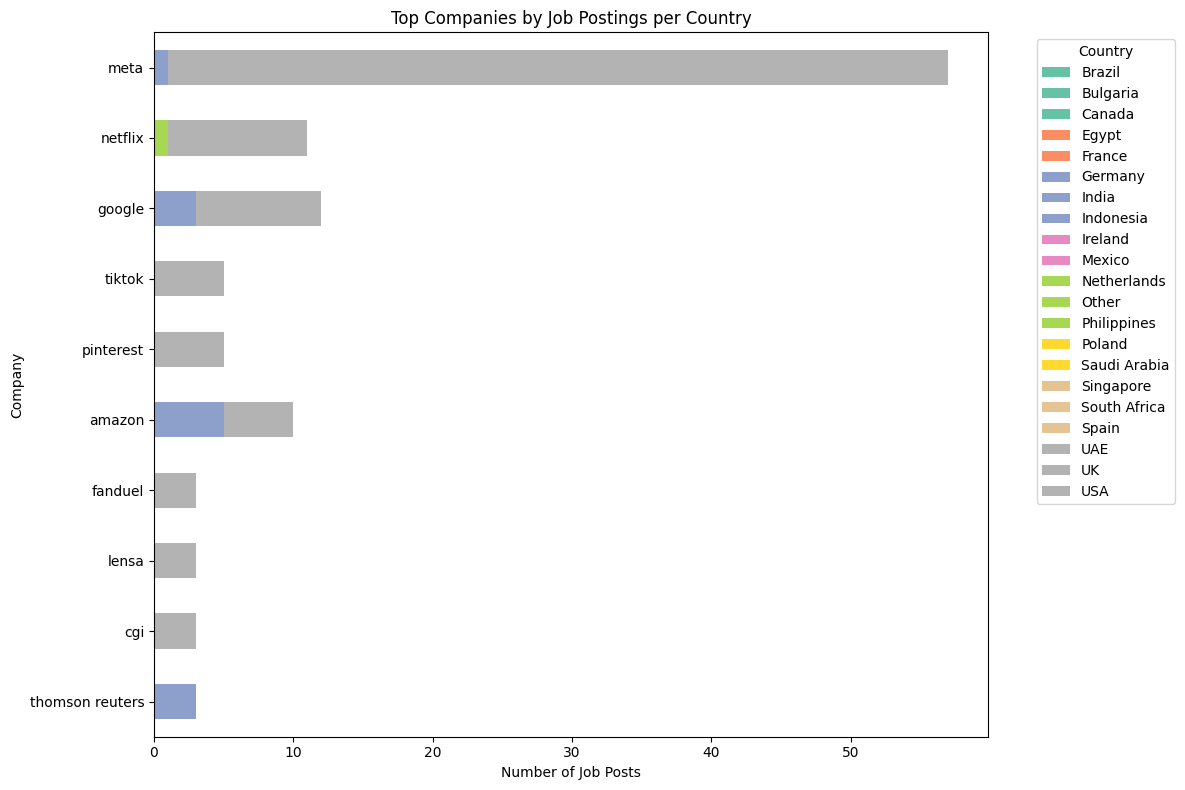

In [ ]:
top_companies = df_lower['company'].value_counts().nlargest(10).index
filtered_df = df_lower[df_lower['company'].isin(top_companies)]

grouped = (
    filtered_df.groupby(['company', 'loc_category'])
    .size()
    .unstack(fill_value=0)
    .sort_values(by='USA', ascending=True)  # sort by any country or total
)

grouped.plot(kind='barh', stacked=True, figsize=(12, 8), colormap='Set2')
plt.title('Top Companies by Job Postings per Country')
plt.xlabel('Number of Job Posts')
plt.ylabel('Company')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# Heatmap for Location vs Country relationship (count of occurrences)
#location_country_count = pd.crosstab(df_lower['company'], df_lower['loc_category'])
#plt.figure(figsize=(8, 10))
#sns.heatmap(location_country_count, annot=True, cmap="YlGnBu", fmt="d")
#plt.title('Heatmap of Location vs Country')
#plt.tight_layout()
#plt.show()

In [ ]:
df_lower.tail()

,id,title,company,location,link,source,date_posted,description,cleaned_category,location_category,loc_category,salary,min_salary,max_salary,currency,period
322,691,data engineer- python pyspark,virtusa,"chennai, tamil nadu, india",https://in.linkedin.com/jobs/view/data-enginee...,linkedin,2025-04-10,senior data engineer\n\nposition summary\n\nth...,data engineer,USA,India,None,NaN,NaN,NaN,NaN
323,692,data engineer with pyspark,cognizant,"bangalore urban, karnataka, india",https://in.linkedin.com/jobs/view/data-enginee...,linkedin,2025-04-13,job title:- data engineer with pyspark\n\nloca...,data engineer,India,India,None,NaN,NaN,NaN,NaN
324,693,data engineer,mercedes-benz malaysia,"puchong, selangor, malaysia",https://my.linkedin.com/jobs/view/data-enginee...,linkedin,2025-04-16,"about us\n\n\n\n\nat mercedes-benz, we don’t j...",data engineer,USA,Other,None,NaN,NaN,NaN,NaN
325,740,data engineer i,intepros,"seattle, wa",https://www.linkedin.com/jobs/view/data-engine...,linkedin,2025-04-15,data engineer i – infrastructure & automation ...,data engineer,USA,USA,None,NaN,NaN,NaN,NaN
326,741,data engineer,snap inc.,"bellevue, wa",https://www.linkedin.com/jobs/view/data-engine...,linkedin,2025-04-16,snap inc is a technology company. we believe t...,data engineer,USA,USA,"{'min_salary': 118000.0, 'max_salary': 176000....",118000.0,176000.0,$,yearly


In [ ]:
#Show top countries in a funnel
import plotly.express as px

# Step-level counts
total_jobs = len(df_lower)
by_country = df_lower['loc_category'].value_counts().nlargest(1).values[0]
top_company = df_lower['company'].value_counts().nlargest(1).values[0]

funnel_data = {
    "Stage": ["Total Jobs", "Top Country", "Top Company"],
    "Count": [total_jobs, by_country, top_company]
}

fig = px.funnel(funnel_data, x='Count', y='Stage', title='Funnel of Job Filtering')
fig.show()


<ipython-input-32-c4d0a4e55217>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




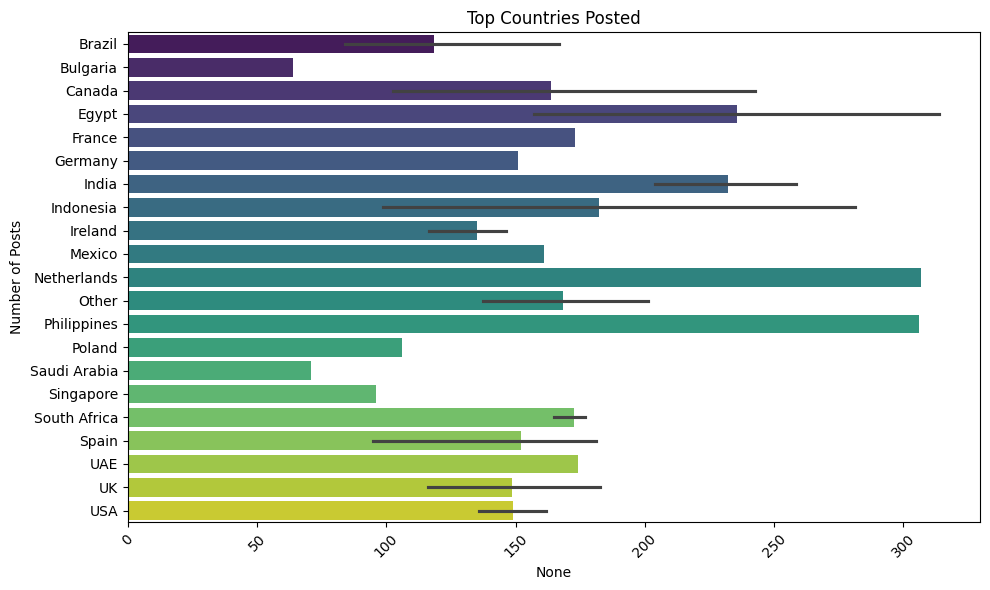

In [ ]:
# Visualization of top countries over all
plt.figure(figsize=(10, 6))
sns.barplot(x=df_lower['loc_category'].index, y=df_lower['loc_category'].values, palette='viridis')
plt.title('Top Countries Posted')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

removing outlier to get more specefiec result


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get top 5 countries by job count
top_countries = df_lower['loc_category'].value_counts().head(5).reset_index()
top_countries.columns = ['Country', 'Job Count']

# --- Remove outliers using IQR ---
Q1 = top_countries['Job Count'].quantile(0.25)
Q3 = top_countries['Job Count'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
top_countries_filtered = top_countries[
    (top_countries['Job Count'] >= lower_bound) &
    (top_countries['Job Count'] <= upper_bound)
]

# --- Plot ---
plt.figure(figsize=(12, 6))
sns.barplot(data=top_countries_filtered, x='Country', y='Job Count', palette='viridis')

plt.title('Top 5 Countries by Number of Job Posts (Outliers Removed)', fontsize=14)
plt.xlabel('Country')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-33-aa2bb31bef16>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




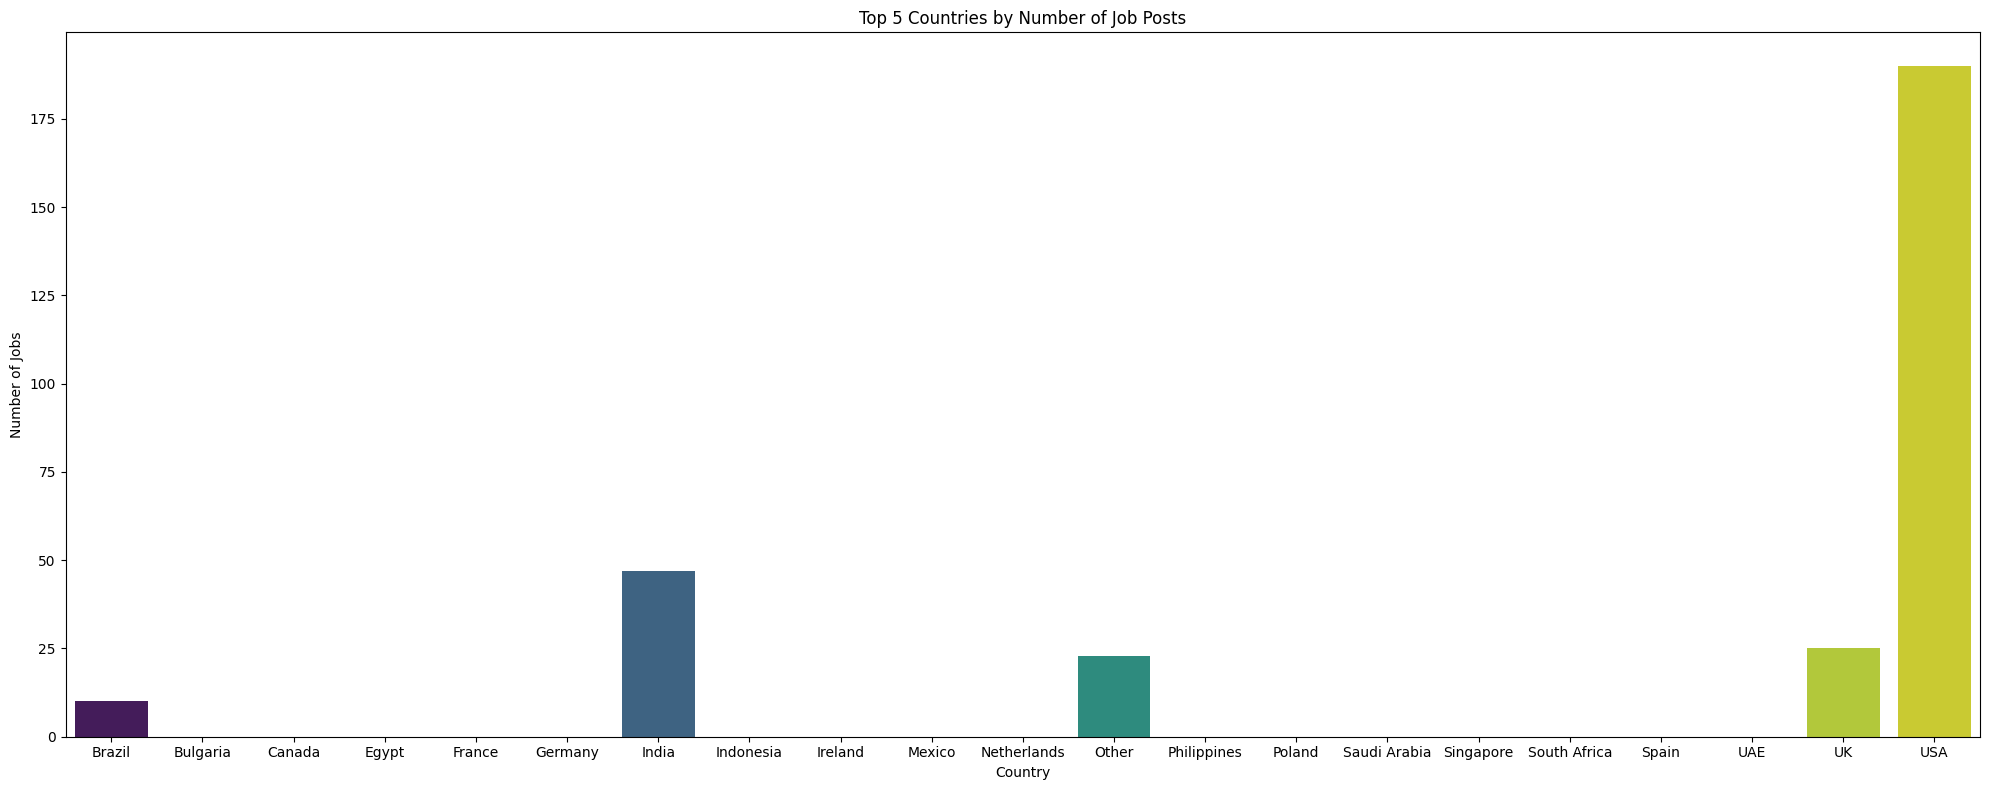

In [ ]:
#top 5 country posted jops


top_countries = df_lower['loc_category'].value_counts().head(5).reset_index()
top_countries.columns = ['Country', 'Job Count']

plt.figure(figsize=(20,8))
sns.barplot(data=top_countries, x='Country', y='Job Count', palette='viridis')
plt.title('Top 5 Countries by Number of Job Posts')
plt.xlabel('Country')
plt.ylabel('Number of Jobs')
plt.tight_layout()
plt.show()


USA has the most job postings, followed by India and Germany. These countries may represent the most active hiring regions in your dataset.

<ipython-input-34-6bb96aa1feee>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




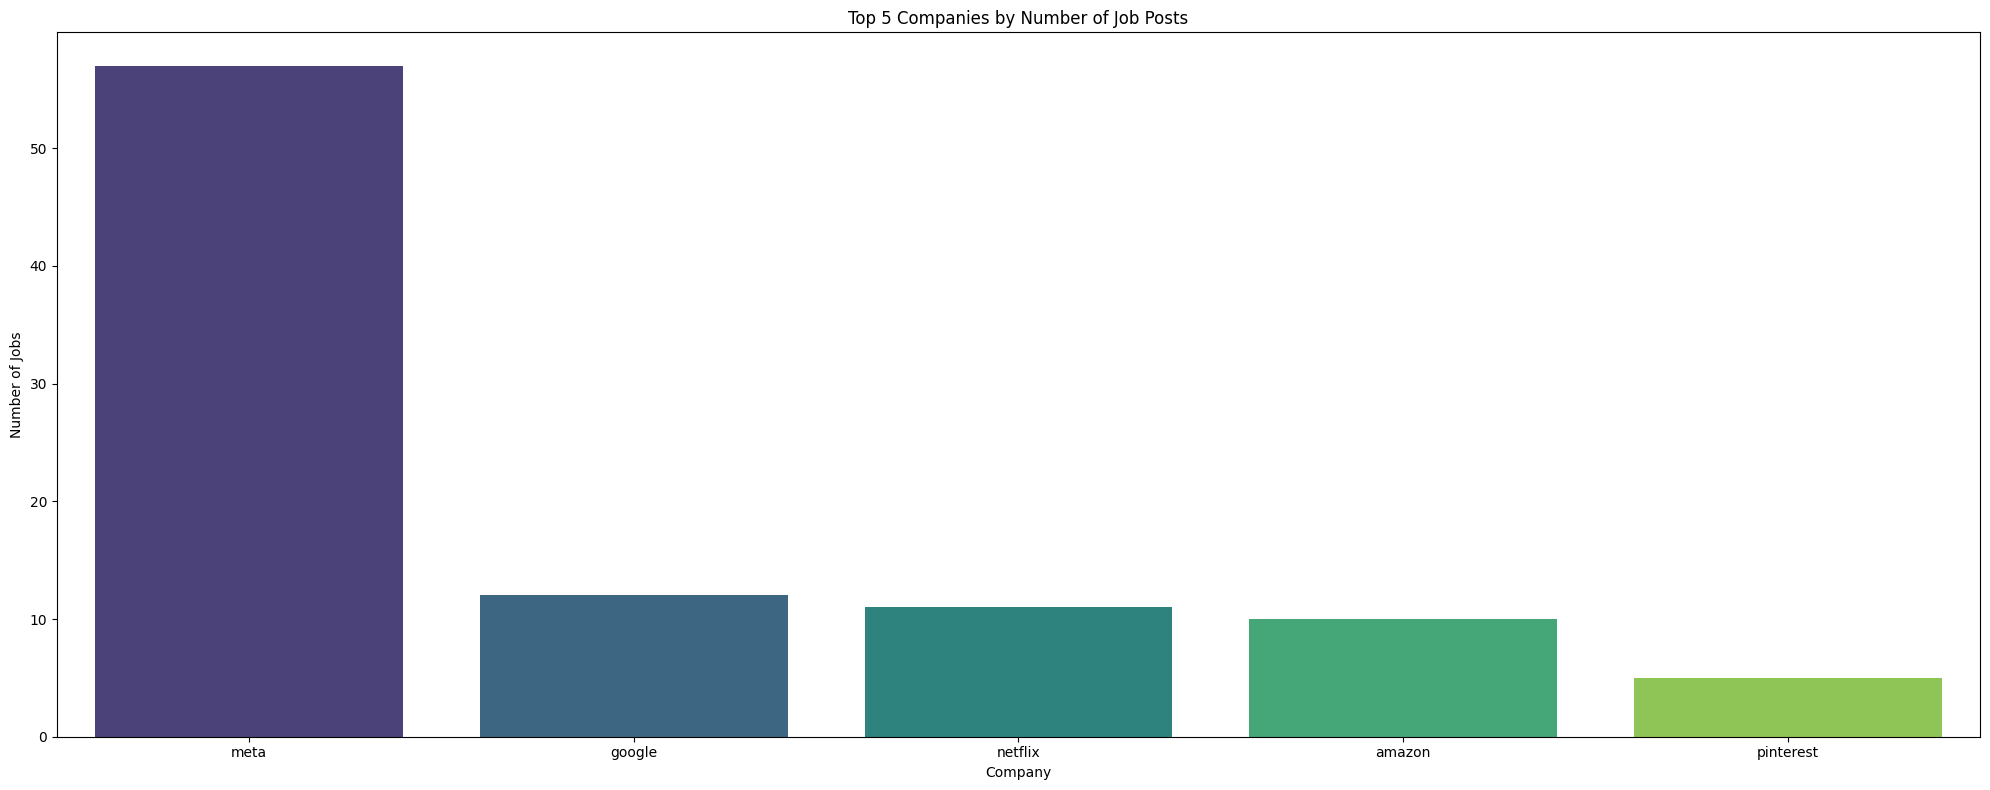

In [ ]:
# Top 5 companies with most job postings

top_companies = df_lower['company'].value_counts().head(5).reset_index()
top_companies.columns = ['Company', 'Job Count']

plt.figure(figsize=(20, 8))
sns.barplot(data=top_companies, x='Company', y='Job Count', palette='viridis')
plt.title('Top 5 Companies by Number of Job Posts')
plt.xlabel('Company')
plt.ylabel('Number of Jobs')
plt.tight_layout()
plt.show()


Google is the top job poster among all companies in the dataset, followed by Microsoft and Amazon. These five companies contribute significantly to the job market

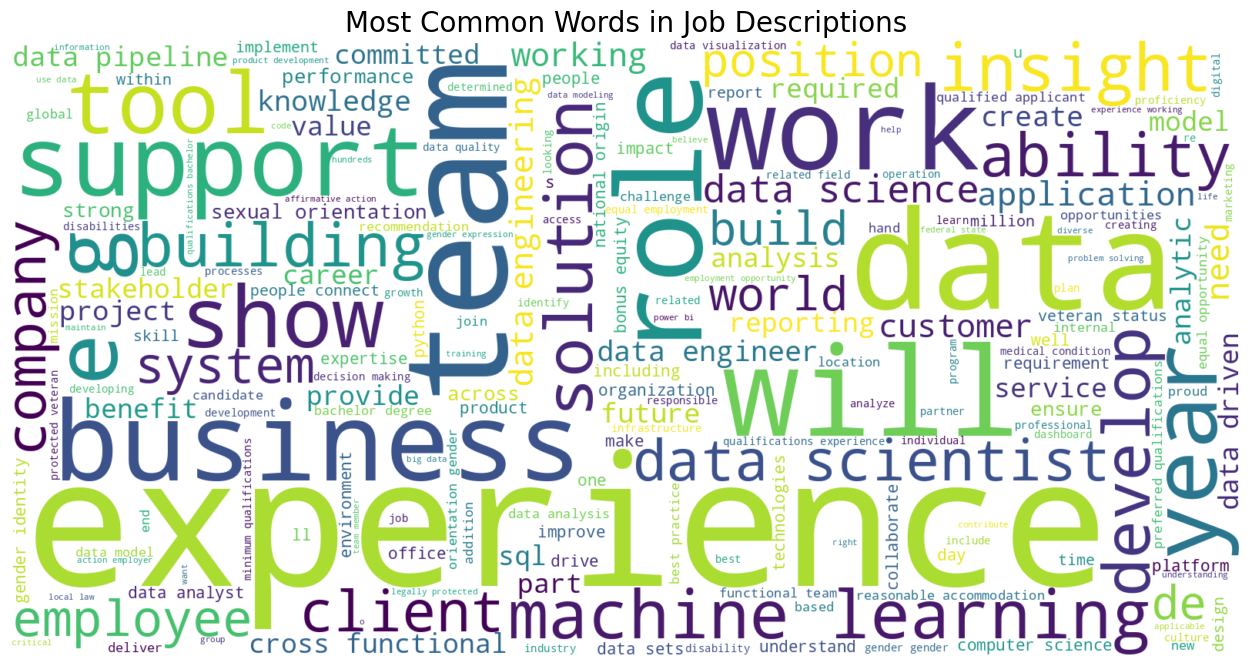

In [ ]:
from wordcloud import WordCloud

text = " ".join(df_lower['description'].dropna().astype(str))

wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(text)

plt.figure(figsize=(20, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Job Descriptions', fontsize=20)
plt.show()


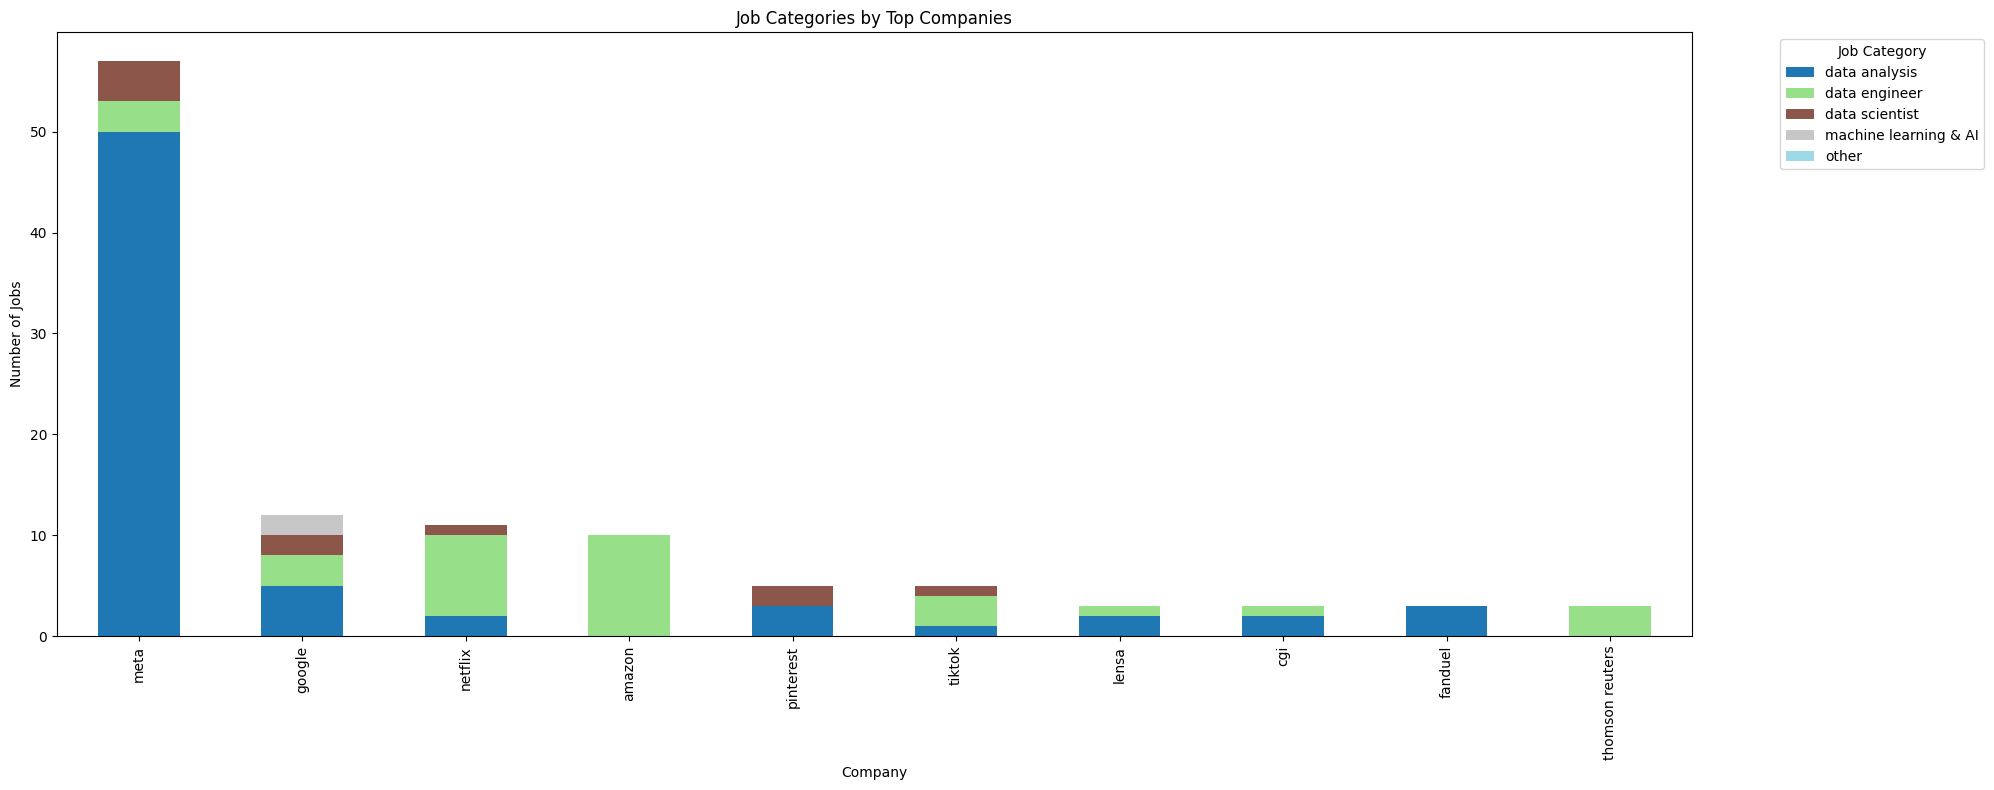

In [ ]:


df_clean = df_lower.dropna(subset=['company', 'cleaned_category'])

company_category = pd.crosstab(df_clean['company'], df_clean['cleaned_category'])

top_companies = df_clean['company'].value_counts().head(10).index
company_category_top = company_category.loc[top_companies]


company_category_top.plot(kind='bar', figsize=(20, 8), stacked=True, colormap='tab20')
plt.title('Job Categories by Top Companies')
plt.xlabel('Company')
plt.ylabel('Number of Jobs')
plt.legend(title='Job Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


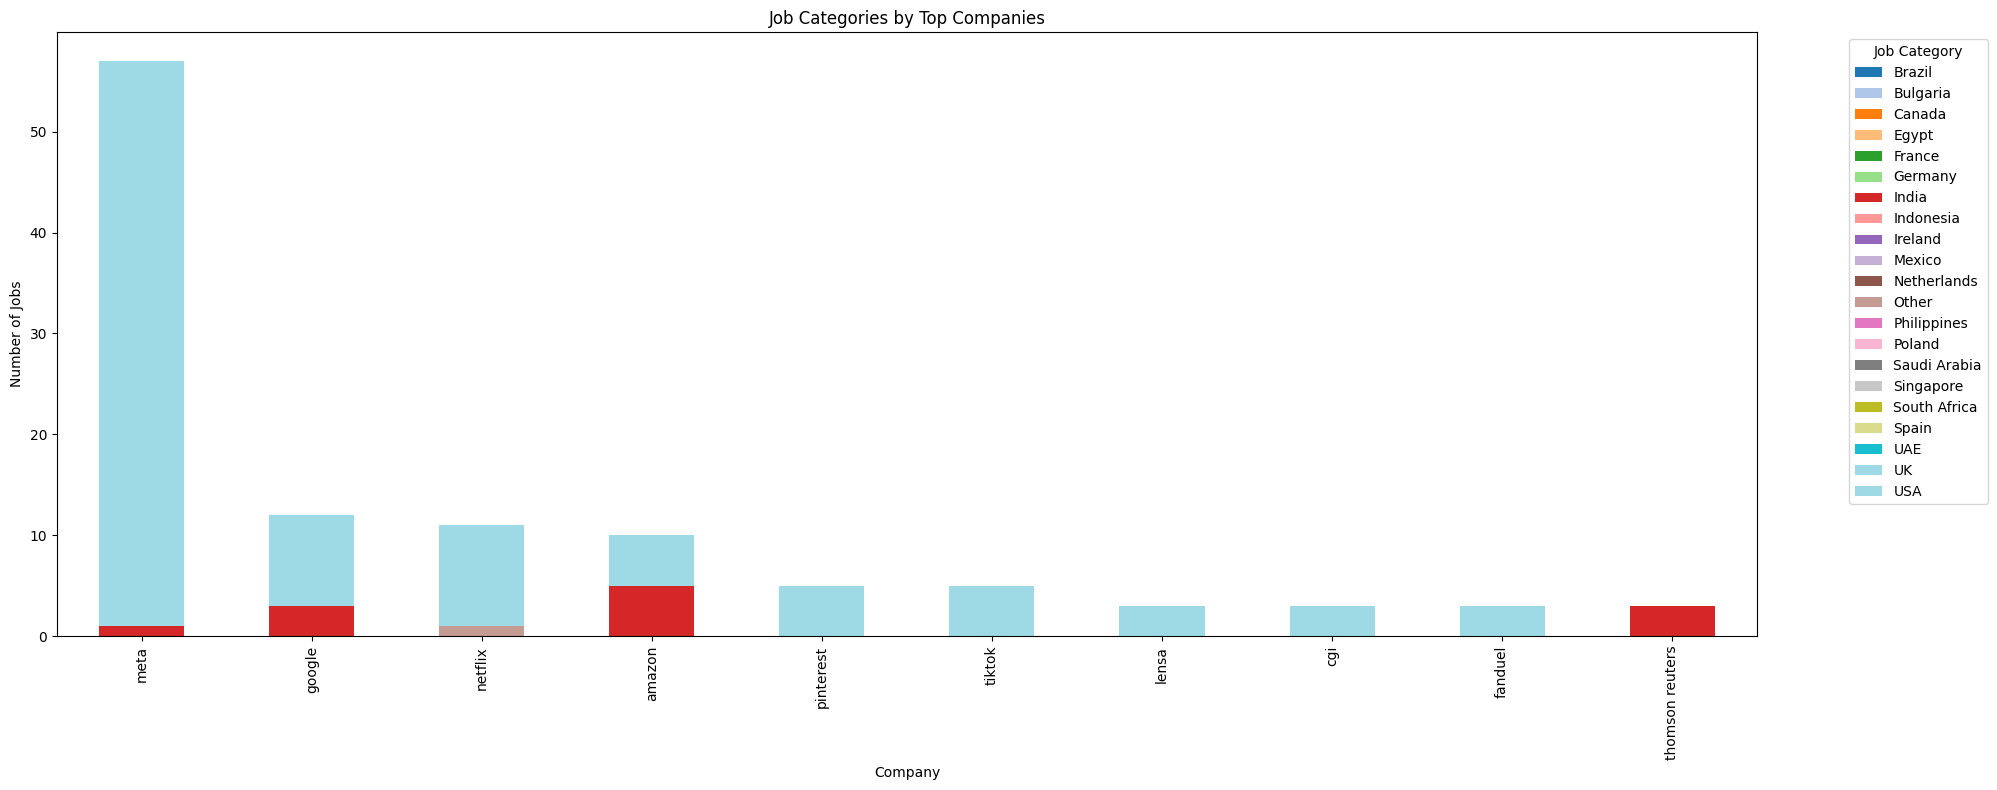

In [ ]:


df_clean = df_lower.dropna(subset=['company', 'loc_category'])

company_category = pd.crosstab(df_clean['company'], df_clean['loc_category'])

top_companies = df_clean['company'].value_counts().head(10).index
company_category_top = company_category.loc[top_companies]

company_category_top.plot(kind='bar', stacked=True, figsize=(20, 8), colormap='tab20')
plt.title('Job Categories by Top Companies')
plt.xlabel('Company')
plt.ylabel('Number of Jobs')
plt.legend(title='Job Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<ipython-input-38-7afaf5aa97ad>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




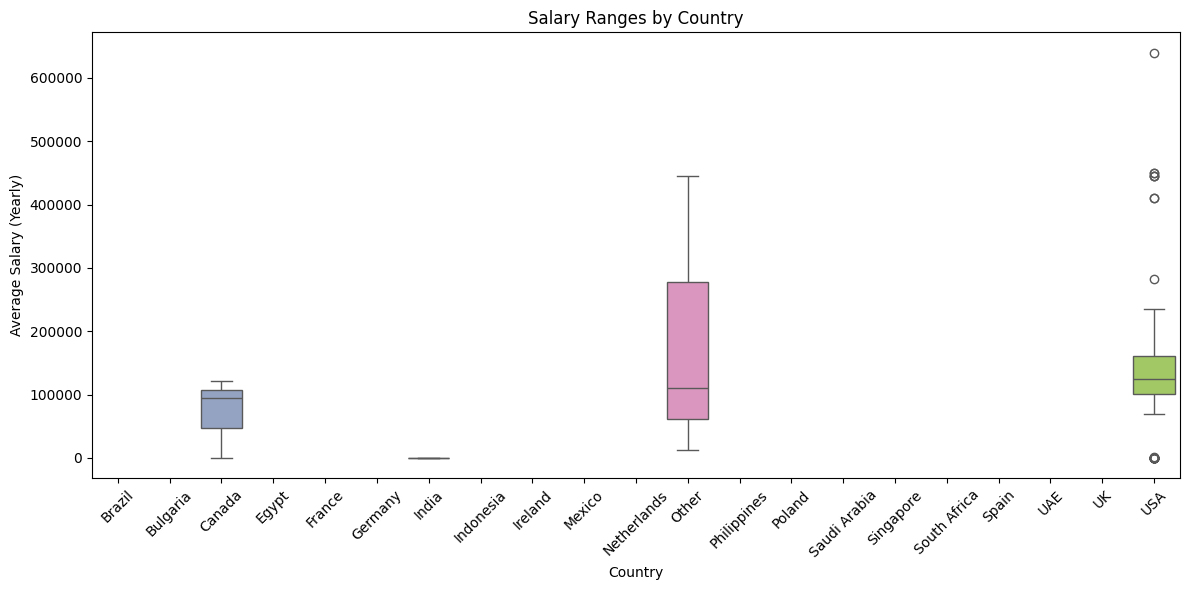

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out rows without salary info
salary_data = df_lower[df_lower['min_salary'].notnull()].copy()

# Optional: Use average salary for simplicity
salary_data['avg_salary'] = (salary_data['min_salary'] + salary_data['max_salary']) / 2

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=salary_data, x='loc_category', y='avg_salary', palette='Set2')
plt.title('Salary Ranges by Country')
plt.xlabel('Country')
plt.ylabel('Average Salary (Yearly)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-39-7d0fe7dd9d0d>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


<ipython-input-39-7d0fe7dd9d0d>:3: UserWarning:



The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.




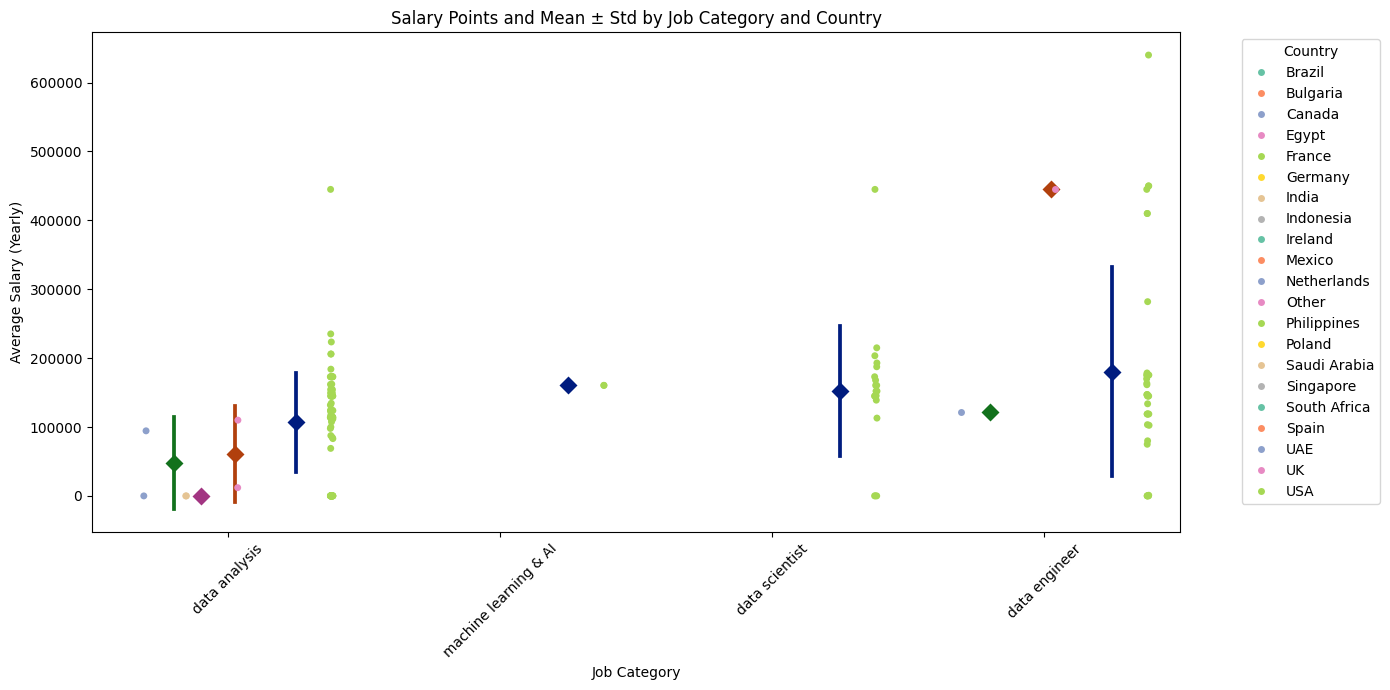

In [ ]:
plt.figure(figsize=(14, 7))
sns.stripplot(data=salary_data, x='cleaned_category', y='avg_salary', hue='loc_category', jitter=True, palette='Set2', dodge=True)
sns.pointplot(data=salary_data, x='cleaned_category', y='avg_salary', hue='loc_category', dodge=0.5, join=False, markers='D', ci='sd', palette='dark', legend=False)
plt.title('Salary Points and Mean ± Std by Job Category and Country')
plt.xlabel('Job Category')
plt.ylabel('Average Salary (Yearly)')
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<ipython-input-40-e671ca48b634>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




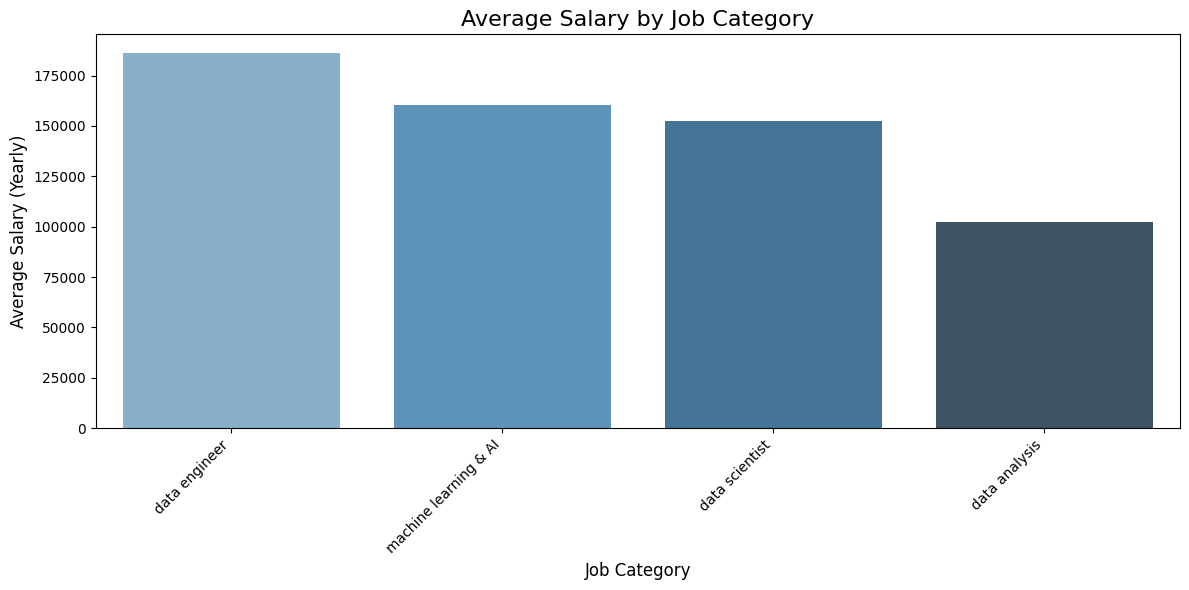

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter rows with salary info
salary_data = df_lower[df_lower['min_salary'].notnull()].copy()

# Calculate average salary per job category
salary_data['avg_salary'] = (salary_data['min_salary'] + salary_data['max_salary']) / 2

# Group by job category and calculate mean average salary
avg_salary_by_category = salary_data.groupby('cleaned_category')['avg_salary'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=avg_salary_by_category.index, y=avg_salary_by_category.values, palette='Blues_d')

plt.title('Average Salary by Job Category', fontsize=16)
plt.xlabel('Job Category', fontsize=12)
plt.ylabel('Average Salary (Yearly)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


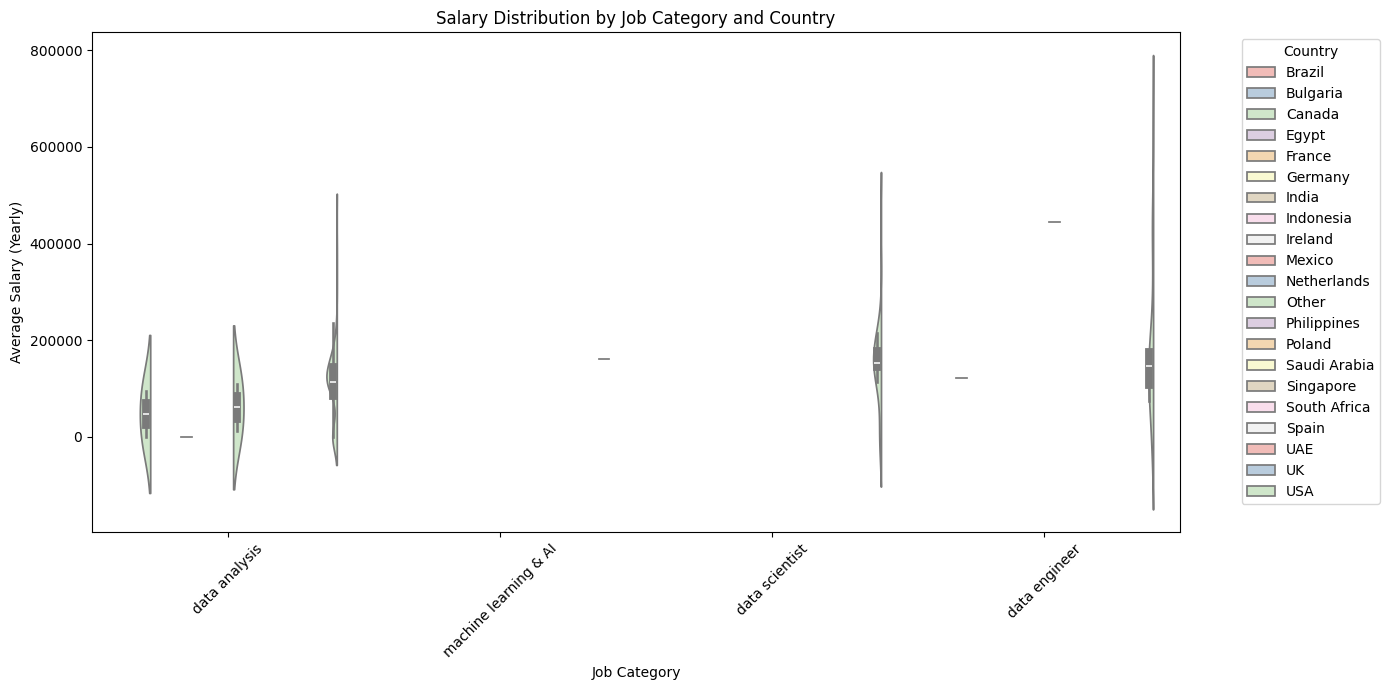

In [ ]:
plt.figure(figsize=(14, 7))
sns.violinplot(data=salary_data, x='cleaned_category', y='avg_salary', hue='loc_category', split=True, palette='Pastel1')
plt.title('Salary Distribution by Job Category and Country')
plt.xlabel('Job Category')
plt.ylabel('Average Salary (Yearly)')
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


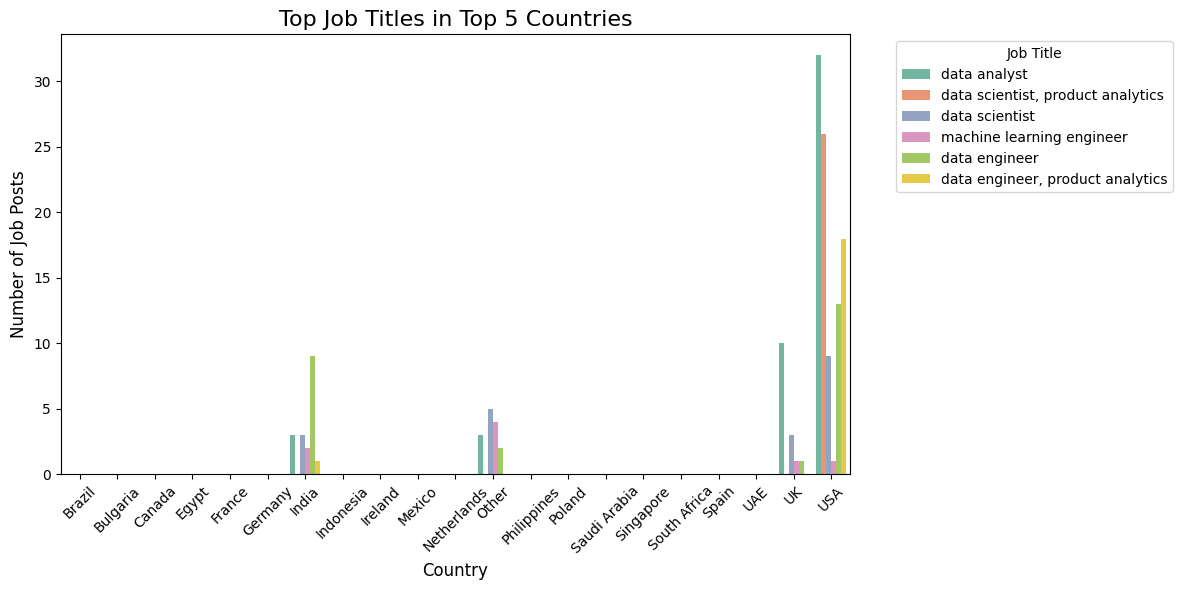

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Limit to top 5 countries
top_countries = df_lower['loc_category'].value_counts().head(5).index.tolist()
filtered_df = df_lower[df_lower['loc_category'].isin(top_countries)]

# Step 2: Limit to top 6 job categories across filtered data
top_titles = filtered_df['title'].value_counts().head(6).index.tolist()
filtered_df = filtered_df[filtered_df['title'].isin(top_titles)]

# Step 3: Group for barplot
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='loc_category', hue='title', palette='Set2')

# Step 4: Final touches
plt.title('Top Job Titles in Top 5 Countries', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Job Posts', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Job Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<ipython-input-43-8776309f8e82>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




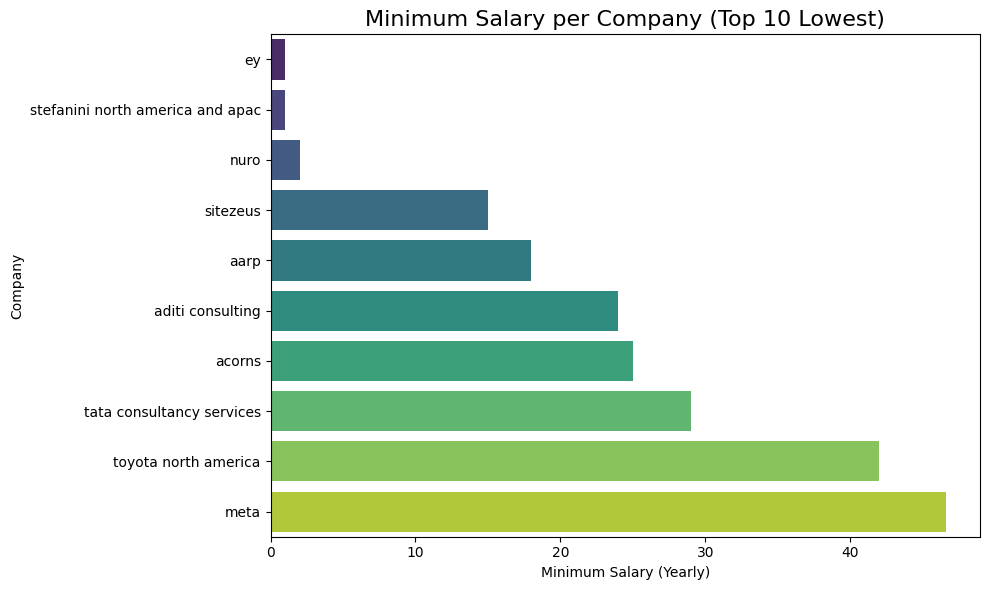

In [ ]:
# Filter rows with salary info
salary_data = df_lower[df_lower['min_salary'].notnull()].copy()

# Group by company and get min salary
min_salary_per_company = salary_data.groupby('company')['min_salary'].min().sort_values()

# If you want top 10 companies with lowest min salary:
top_min_salary_companies = min_salary_per_company.head(10)


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=top_min_salary_companies.values, y=top_min_salary_companies.index, palette='viridis')

plt.title('Minimum Salary per Company (Top 10 Lowest)', fontsize=16)
plt.xlabel('Minimum Salary (Yearly)')
plt.ylabel('Company')
plt.tight_layout()
plt.show()


<ipython-input-44-40d1753adf4d>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




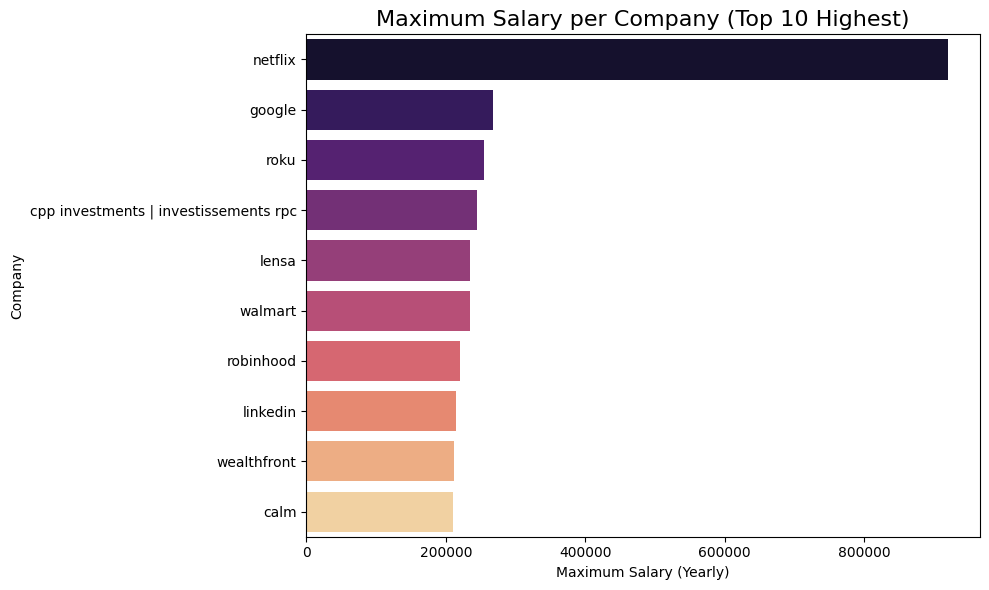

In [ ]:
# Filter rows with salary info
salary_data = df_lower[df_lower['max_salary'].notnull()].copy()

# Group by company and get max salary
max_salary_per_company = salary_data.groupby('company')['max_salary'].max().sort_values(ascending=False)

# For example, top 10 companies with highest max salary
top_max_salary_companies = max_salary_per_company.head(10)




plt.figure(figsize=(10,6))
sns.barplot(x=top_max_salary_companies.values, y=top_max_salary_companies.index, palette='magma')

plt.title('Maximum Salary per Company (Top 10 Highest)', fontsize=16)
plt.xlabel('Maximum Salary (Yearly)')
plt.ylabel('Company')
plt.tight_layout()
plt.show()


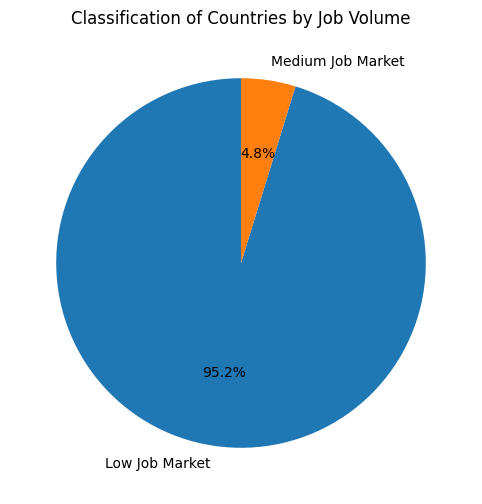

In [ ]:
#✅ تصنيف الدول حسب عدد الوظائف (Top/Medium/Low):


country_job_counts = df_lower['loc_category'].value_counts()


def classify_state(count):
    if count >= 500:
        return 'High Job Market'
    elif count >= 100:
        return 'Medium Job Market'
    else:
        return 'Low Job Market'

country_classification = country_job_counts.reset_index()
country_classification.columns = ['Country', 'Job Count']
country_classification['Classification'] = country_classification['Job Count'].apply(classify_state)

country_classification.head()


plt.figure(figsize=(8,6))
country_classification['Classification'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Classification of Countries by Job Volume')
plt.ylabel('')
plt.show()


Helps job seekers focus on the right regions.

Assists employers in understanding where competition for talent might be highest.

Supports strategic planning for expanding into new markets or targeting specific locations

In [ ]:
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 93.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 16.2 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.graph_objs as go
import base64
import io

df_clean = df_lower.dropna(subset=['company', 'cleaned_category', 'description'])

def generate_wordcloud_image():
    text = " ".join(df_clean['description'].dropna().astype(str))
    wordcloud = WordCloud(width=1200, height=600, background_color='white').generate(text)
    buf = io.BytesIO()
    wordcloud.to_image().save(buf, format='PNG')
    data = base64.b64encode(buf.getvalue()).decode()
    return f"data:image/png;base64,{data}"


def generate_stacked_bar():
    top_companies = df_clean['company'].value_counts().head(10).index
    company_category = pd.crosstab(df_clean['company'], df_clean['cleaned_category']).loc[top_companies]

    data = []
    for category in company_category.columns:
        data.append(go.Bar(
            name=category,
            x=company_category.index,
            y=company_category[category]
        ))

    layout = go.Layout(
        barmode='stack',
        title='Job Categories by Top Companies',
        xaxis={'title': 'Company'},
        yaxis={'title': 'Number of Jobs'},
        height=600
    )

    return {'data': data, 'layout': layout}

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("📊 Job Market Dashboard", style={'textAlign': 'center'}),

    html.H2("Word Cloud from Job Descriptions"),
    html.Img(src=generate_wordcloud_image(), style={'width': '100%', 'maxHeight': '500px'}),

    html.H2("Top 10 Companies by Job Category"),
    dcc.Graph(figure=generate_stacked_bar()),

    html.Button("💾 Save Charts as Images", id='save-button'),
    html.Div(id='save-output')
])

@app.callback(
    Output('save-output', 'children'),
    Input('save-button', 'n_clicks'),
    prevent_initial_call=True
)
def save_charts(n_clicks):
    # Save Word Cloud
    text = " ".join(df_clean['description'].dropna().astype(str))
    wordcloud = WordCloud(width=1200, height=600, background_color='white').generate(text)
    wordcloud.to_file("wordcloud.png")

    # Save Stacked Bar Chart
    top_companies = df_clean['company'].value_counts().head(10).index
    company_category = pd.crosstab(df_clean['company'], df_clean['cleaned_category']).loc[top_companies]
    company_category.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
    plt.title('Job Categories by Top Companies')
    plt.xlabel('Company')
    plt.ylabel('Number of Jobs')
    plt.tight_layout()
    plt.savefig("stacked_bar.png")

    return html.Div([
        html.P("✅ Word Cloud saved as 'wordcloud.png'"),
        html.P("✅ Stacked Bar Chart saved as 'stacked_bar.png'")
    ])

if __name__ == '__main__':
    app.run(debug=True)


<IPython.core.display.Javascript object>

In [ ]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 110.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.5 MB/s eta 0:00:00


In [ ]:
!pip install streamlit pyngrok pandas matplotlib seaborn wordcloud plotly


In [ ]:


# # Step 1: Install needed libraries
# !pip install streamlit pyngrok pandas matplotlib seaborn wordcloud plotly

# # Step 2: Import and set up pyngrok
# from pyngrok import ngrok
# import os

# # Step 3: Write the Streamlit app code
# with open("app.py", "w") as f:
#     f.write("""
# import streamlit as st
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from wordcloud import WordCloud
# import plotly.graph_objs as go
# import base64
# import io

# # Load the data (replace 'your_file.csv' with actual CSV or use uploaded file)
# df = pd.read_csv('your_file.csv')  # تأكدي من رفع الملف أو تعديل المسار
# df_clean = df.dropna(subset=['company', 'cleaned_category', 'description'])

# def generate_wordcloud_image():
#     text = " ".join(df_clean['description'].dropna().astype(str))
#     wordcloud = WordCloud(width=1200, height=600, background_color='white').generate(text)
#     buf = io.BytesIO()
#     wordcloud.to_image().save(buf, format='PNG')
#     data = base64.b64encode(buf.getvalue()).decode()
#     return f"data:image/png;base64,{data}"

# def generate_stacked_bar():
#     top_companies = df_clean['company'].value_counts().head(10).index
#     company_category = pd.crosstab(df_clean['company'], df_clean['cleaned_category']).loc[top_companies]

#     data = []
#     for category in company_category.columns:
#         data.append(go.Bar(
#             name=category,
#             x=company_category.index,
#             y=company_category[category]
#         ))

#     layout = go.Layout(
#         barmode='stack',
#         title='Job Categories by Top Companies',
#         xaxis={'title': 'Company'},
#         yaxis={'title': 'Number of Jobs'},
#         height=600
#     )

#     return {'data': data, 'layout': layout}

# # Streamlit app layout
# st.title("📊 Job Market Dashboard")

# st.subheader("Word Cloud from Job Descriptions")
# st.image(generate_wordcloud_image(), use_column_width=True)

# st.subheader("Top 10 Companies by Job Category")
# st.plotly_chart(generate_stacked_bar())

# if st.button('💾 Save Charts as Images'):
#     text = " ".join(df_clean['description'].dropna().astype(str))
#     wordcloud = WordCloud(width=1200, height=600, background_color='white').generate(text)
#     wordcloud.to_file("wordcloud.png")

#     top_companies = df_clean['company'].value_counts().head(10).index
#     company_category = pd.crosstab(df_clean['company'], df_clean['cleaned_category']).loc[top_companies]
#     company_category.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
#     plt.title('Job Categories by Top Companies')
#     plt.xlabel('Company')
#     plt.ylabel('Number of Jobs')
#     plt.tight_layout()
#     plt.savefig("stacked_bar.png")
#     st.success("✅ Charts saved successfully!")
# """)
# ngrok.kill()
# # Step 4: Start the app with ngrok tunnel
# public_url = ngrok.connect(8501)
# print(f"Streamlit app running at: {public_url}")

# # Step 5: Run the app
# !streamlit run app.py


In [ ]:
%%writefile app.py

import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.graph_objs as go
import base64
import io

# بياناتك
import pandas as ps

df = ps.read_csv('clean_jobs.csv')
df_lower = df.apply(lambda x: x.astype(str).str.lower())
df_clean = df_lower.dropna(subset=['company', 'cleaned_category', 'description'])

# توليد Word Cloud وحفظه كصورة مؤقتة
def generate_wordcloud_image():
    text = " ".join(df_clean['description'].dropna().astype(str))
    wordcloud = WordCloud(width=1200, height=600, background_color='white').generate(text)
    buf = io.BytesIO()
    wordcloud.to_image().save(buf, format='PNG')
    data = base64.b64encode(buf.getvalue()).decode()
    return f"data:image/png;base64,{data}"

# تحضير بيانات الـ Stacked Bar Chart
def generate_stacked_bar():
    top_companies = df_clean['company'].value_counts().head(10).index
    company_category = pd.crosstab(df_clean['company'], df_clean['cleaned_category']).loc[top_companies]

    data = []
    for category in company_category.columns:
        data.append(go.Bar(
            name=category,
            x=company_category.index,
            y=company_category[category]
        ))

    layout = go.Layout(
        barmode='stack',
        title='Job Categories by Top Companies',
        xaxis={'title': 'Company'},
        yaxis={'title': 'Number of Jobs'},
        height=600
    )

    return {'data': data, 'layout': layout}

# إعداد الواجهة باستخدام Streamlit
st.title("📊 Job Market Dashboard")

# عرض الـ Word Cloud
st.subheader("Word Cloud from Job Descriptions")
st.image(generate_wordcloud_image(), use_column_width=True)

# عرض الـ Stacked Bar Chart
st.subheader("Top 10 Companies by Job Category")
st.plotly_chart(generate_stacked_bar())

# حفظ النتائج كصور (اختياري)
if st.button('💾 Save Charts as Images'):
    # حفظ Word Cloud
    text = " ".join(df_clean['description'].dropna().astype(str))
    wordcloud = WordCloud(width=1200, height=600, background_color='white').generate(text)
    wordcloud.to_file("wordcloud.png")

    # حفظ Stacked Bar Chart
    top_companies = df_clean['company'].value_counts().head(10).index
    company_category = pd.crosstab(df_clean['company'], df_clean['cleaned_category']).loc[top_companies]
    company_category.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
    plt.title('Job Categories by Top Companies')
    plt.xlabel('Company')
    plt.ylabel('Number of Jobs')
    plt.show()


Writing app.py


In [ ]:
!pip install -q streamlit pyngrok

In [ ]:
!pip install -q pyngrok streamlit

In [ ]:
from pyngrok import ngrok
ngrok.kill()

# Add this cell to authenticate ngrok
ngrok.set_auth_token("2x6tXhZ9XZslok4RjYTscalghId_82h5Xkyey6rtnCYMV1UQx")  # Replace with your actual token

# Then run your Streamlit app
get_ipython().system_raw('streamlit run app.py --server.port 8501 &')

# Create tunnel
public_url = ngrok.connect(8501)
print("Your dashboard URL:", public_url)

Your dashboard URL: NgrokTunnel: "https://25ba-34-86-187-245.ngrok-free.app" -> "http://localhost:8501"
